<a href="https://colab.research.google.com/github/Bernardo-Santos23/MLII_Individual/blob/main/Random_Forrest_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASSIFY KYPHOSIS DISEASE USING DECISION TREES AND RANDOM FOREST CLASSIFIER




# PROBLEM STATEMENT

**Predicting if a person has diabetes based on a number of attributes**

INPUTS:
    - Number of pregnancies: number of times a person was pregnant
    - Glucose Level: glucose levels in a person's blood
    - Blood Pressure: levels of blood pressure for each individual
    - Skin Thickness: how thick the skin is in mm
    - Insulin levels: insulin levels in the blood
    - BMI: Body Mass Index measuring weight, height etc.
    - Diabetes Pedigree Function
    - Age: how old a person is

OUTPUTS:
- Outcome: if a person is diabetic or not

Dataset: `diabetes.csv`

# Step 1: Importing the libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# STEP 2: Importing the diabetes.csv Dataset

In [4]:
diabetes_df = pd.read_csv("diabetes.csv")

In [5]:
diabetes_df.head(10)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33
5,0,5,116,74,0,0,25.6,0.201,30
6,1,3,78,50,32,88,31.0,0.248,26
7,0,10,115,0,0,0,35.3,0.134,29
8,1,2,197,70,45,543,30.5,0.158,53
9,1,8,125,96,0,0,0.0,0.232,54


In [6]:
diabetes_df.tail()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,0,10,101,76,48,180,32.9,0.171,63
764,0,2,122,70,27,0,36.8,0.340,27
765,0,5,121,72,23,112,26.2,0.245,30
766,1,1,126,60,0,0,30.1,0.349,47
767,0,1,93,70,31,0,30.4,0.315,23


In [7]:
diabetes_df.describe()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.348958,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,0.476951,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,0.000000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,0.000000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,1.000000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,1.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# STEP 3: VISUALIZE DATASET (EDA)

Exploratory Data Analysis (EDA) revealed key insights into the dataset's structure and relationships. The target variable (`Outcome`) shows a class imbalance, with significantly more non-diabetic (Outcome = 0) samples than diabetic (Outcome = 1), which may require resampling techniques to balance the data. A correlation heatmap identified `Glucose` as the strongest predictor of diabetes (correlation: 0.47), followed by `BMI`, `Pregnancies`, and `Age`, while other features like `BloodPressure` and `SkinThickness` showed weaker relevance. Pair plot analysis further highlighted distinct patterns for `Glucose` between diabetic and non-diabetic individuals, providing evidence for its predictive importance. These findings guide the next steps, including handling missing values, addressing class imbalance, and prioritizing highly correlated features during model development.

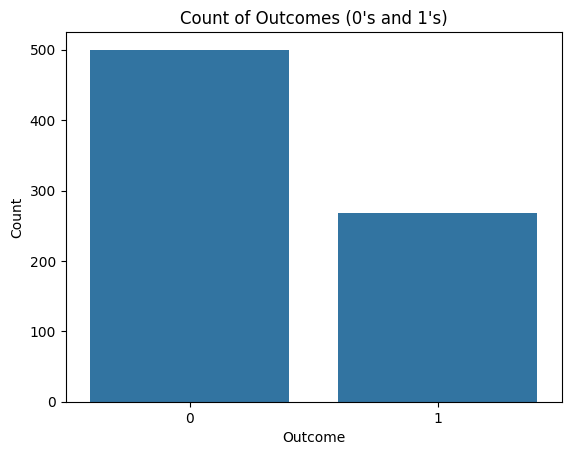

In [8]:
sns.countplot(x='Outcome', data=diabetes_df)

plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Count of Outcomes (0's and 1's)")
plt.show()

# here we are counting the number of 0's and 1's in the column 'Outcome', where 0's mean the person is not diabetic and 1's mean the person is diabetic.

In [9]:
Diabetes_True = diabetes_df[diabetes_df['Outcome']==1] # creating a new variable called 'Diabetes_True' which contains all the rows where the column 'Outcome' is 1.

In [10]:
Diabetes_False = diabetes_df[diabetes_df['Outcome']==0] # creating a new variable called 'Diabetes_False' which contains all the rows where the column 'Outcome' is 0.

In [11]:
print( 'The number of people in our sample that have diabetes =', (len(Diabetes_True) / len(diabetes_df) )*100,"%")

# here we are calculating the percentage of people in our sample that have diabetes.

The number of people in our sample that have diabetes = 34.89583333333333 %


<Axes: >

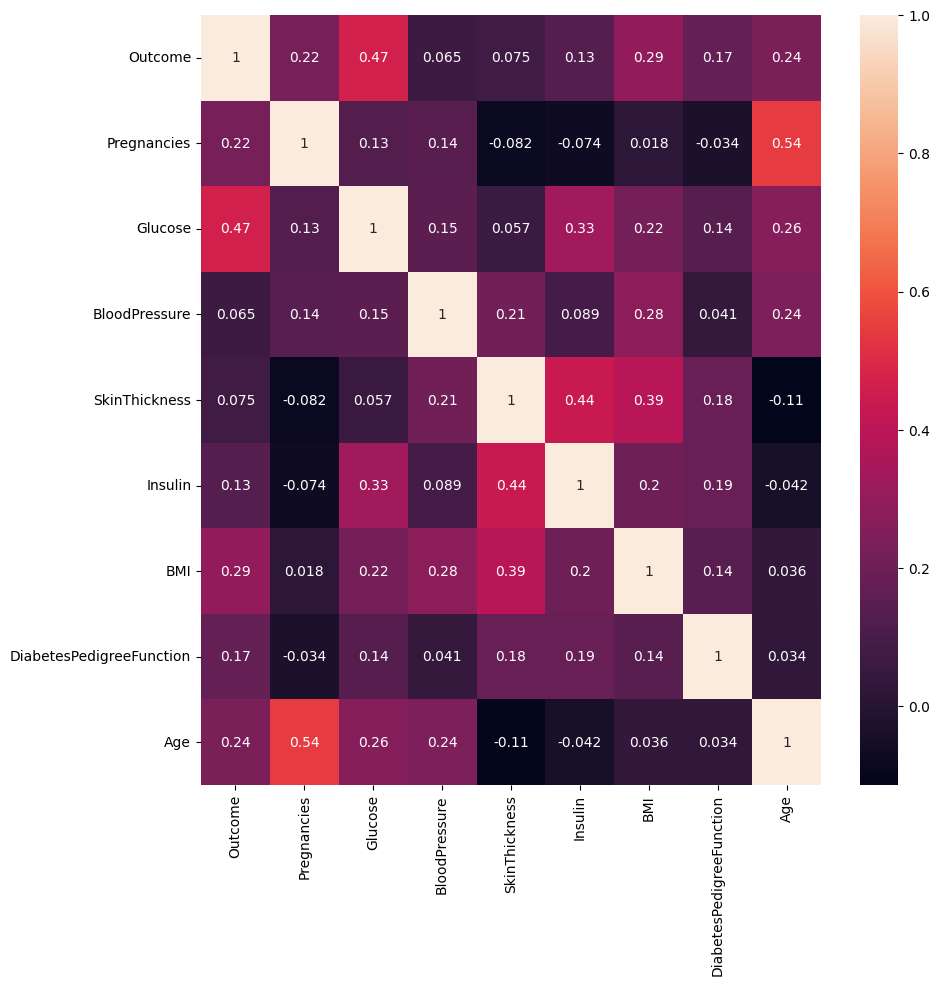

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_df.corr(), annot=True)

# here we are creating a heatmap to show the correlation between the different columns in the dataset.
# after this I will use hte variables with the highest correlation and analyse them further.

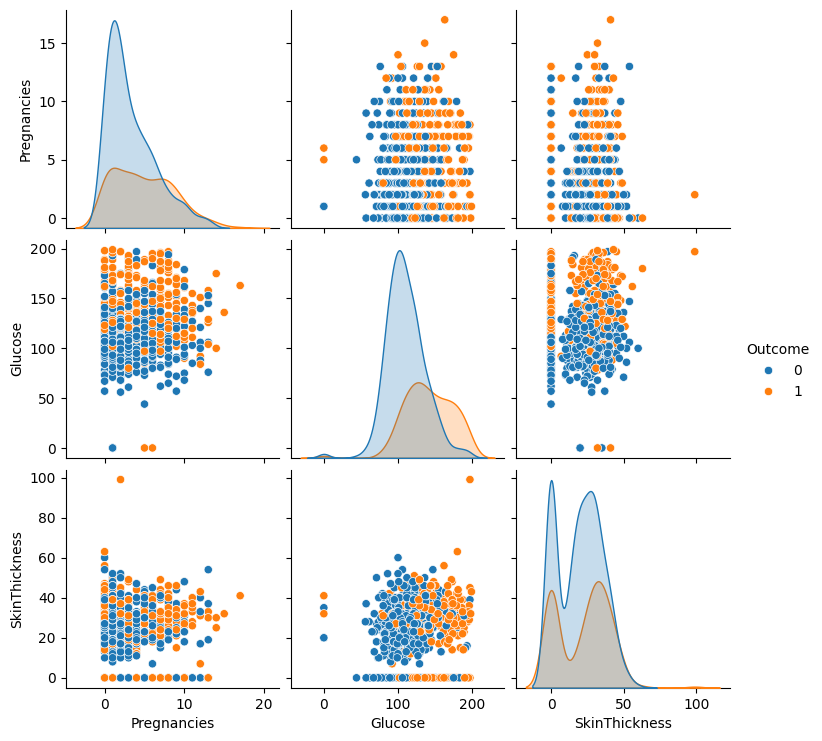

In [13]:
sns.pairplot(diabetes_df, hue='Outcome', vars = ['Pregnancies', 'Glucose', 'SkinThickness'])

# analysing the variables with the highest correlation

# STEP 4: Data Cleaning

In this section I performed some simple data cleaning techniques, as the data was almost ready to be used

In [14]:
# Checking for null values in each column

null_counts = diabetes_df.isnull().sum()
print(null_counts)

Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [15]:
# Checking for inconsistent data types

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Step 5: Target Variable and Train Test Split

In [16]:
# Create a target variable

X = diabetes_df.drop(['Outcome'],axis=1)
y = diabetes_df['Outcome']


In [17]:
X # non-target variables used to predict the target variable

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y #target variable

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# these last few lines of code are used to split the data into training and testing data, and to scale the data so that the model can be trained on it

# STEP 6: Training a Decision Tree

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

# here we are creating a decision tree model and training it on the training data

DecisionTreeClassifier()

In [24]:
feature_importances = pd.DataFrame(
    decision_tree.feature_importances_,
    index=[f"feature_{i}" for i in range(X_train.shape[1])],  # Generates generic feature names
    columns=['importance']
).sort_values('importance', ascending=False)

# here we are creating a dataframe to show the importance of each feature in the model

In [25]:
feature_importances

#struggled to get the real names of the features, as the only way I could obtain the importance was by using list comprehension to generate generic feature names
# feature_1 is pregnancies, feature_2 is glucose, feature_3 is blood pressure,
# feature_4 is skin thickness, feature_5 is insulin, feature_6 is BMI, feature_7 is DiabetesPedigreeFunction, feature_8 is Age

,importance
feature_1,0.293705
feature_5,0.194323
feature_7,0.157647
feature_2,0.107843
feature_6,0.084573
feature_3,0.058627
feature_0,0.058527
feature_4,0.044754


# STEP 7: EVALUATING THE MODEL (Decision Tree)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# importing the necessary libraries to evaluate the model, confusion matrix and classification report


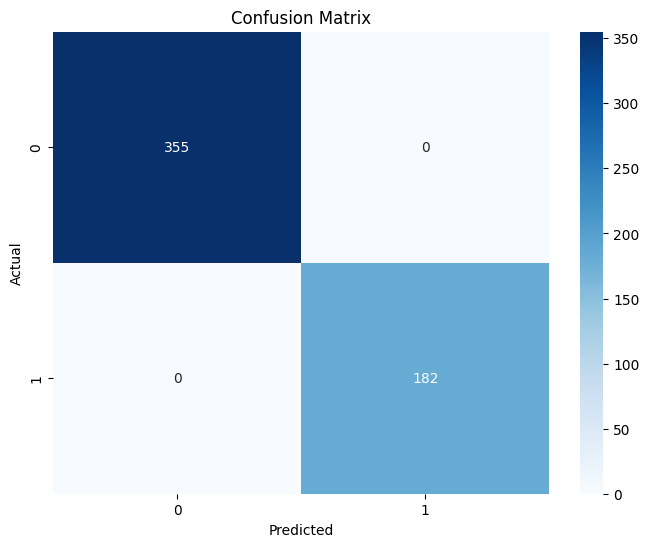

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on the training data
y_predict_train = decision_tree.predict(X_train)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_predict_train)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # fmt='g' avoids scientific notation

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# By using fmt='g' we can suppress scientific notation and display the values in the matrix in standard format
# here we are creating a confusion matrix to evaluate the model

# The model seems to be overfitted as it predicts training data perfectly, but not the testing data

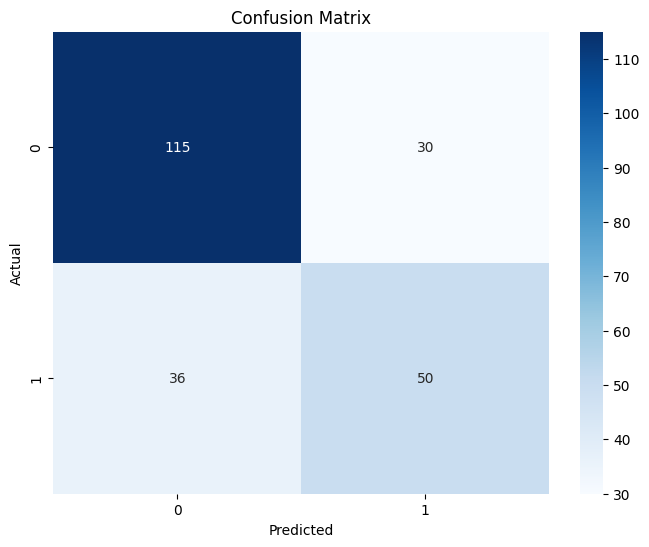

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on the training data
y_predict_test = decision_tree.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_predict_test)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # fmt='g' avoids scientific notation

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# as referred above, the model does not look like its completely overfitted, as it does not predict the testing data perfectly

In [29]:
print(classification_report(y_test, y_predict_test))

# these results shows a model that predicts better for class 0 than class 1, as the precision, recall and f1-score are all higher for class 0 than class 1
# meaning it is better at predicting when a person is not diabetic than when a person is diabetic

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       145
           1       0.62      0.58      0.60        86

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [30]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
from io import StringIO

features = list(diabetes_df.columns[1:])
features


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [31]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,
    feature_names=features,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = Source(dot_data.getvalue())
graph.render("decision_tree", format="png")  # Save as a PNG
graph.view()  # View the graph


'decision_tree.pdf'

# STEP 8: Training and evaluating a RANDOM FOREST model

In [32]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [33]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       145
           1       0.62      0.58      0.60        86

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



<Axes: >

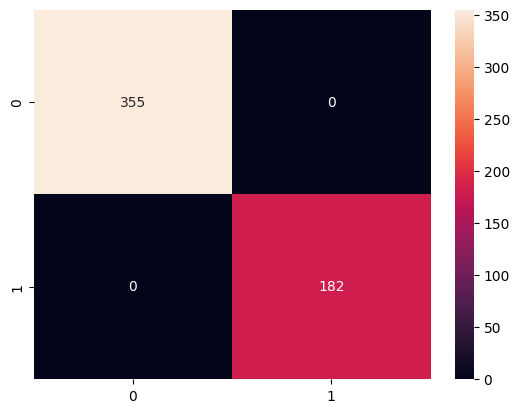

In [34]:
y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt='g')

<Axes: >

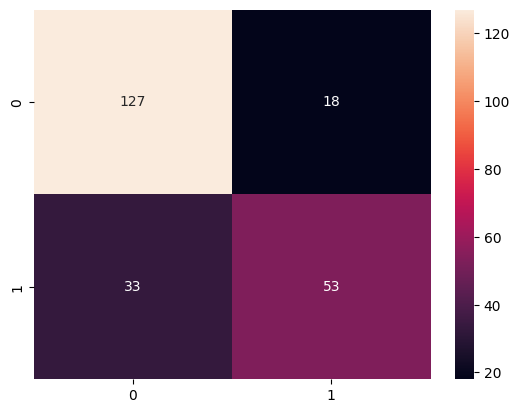

In [35]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='g')

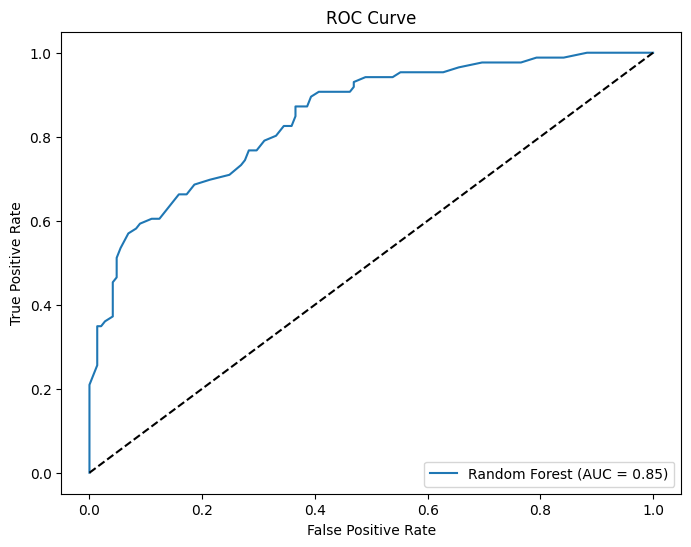

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train your Random Forest model (assuming X_train, y_train, X_test, y_test are already defined)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
# saving the model
import pickle
pickle_out = open("diabetes.pkl", mode = "wb")
pickle.dump(RandomForest, pickle_out)
pickle_out.close()